## Importing Libraries and Loading Data

In [1]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
plotly.tools.set_credentials_file(username='rounakbanik', api_key='xTLaHBy9MVv5szF4Pwan')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [2]:
df = pd.read_csv('movies_metadata.csv')
df.head().transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

## Data Wrangling

In [4]:
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [5]:
df = df.drop('adult', axis=1)

In [6]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)

In [7]:
df = df.drop(['imdb_id'], axis=1)

In [8]:
df[df['original_title'] != df['title']][['title', 'original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


In [9]:
df = df.drop('original_title', axis=1)

In [10]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [11]:
df['revenue'] = df['revenue'].replace(0, np.nan)

## EDA

#### Title and Overview Wordclouds

In [12]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [13]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

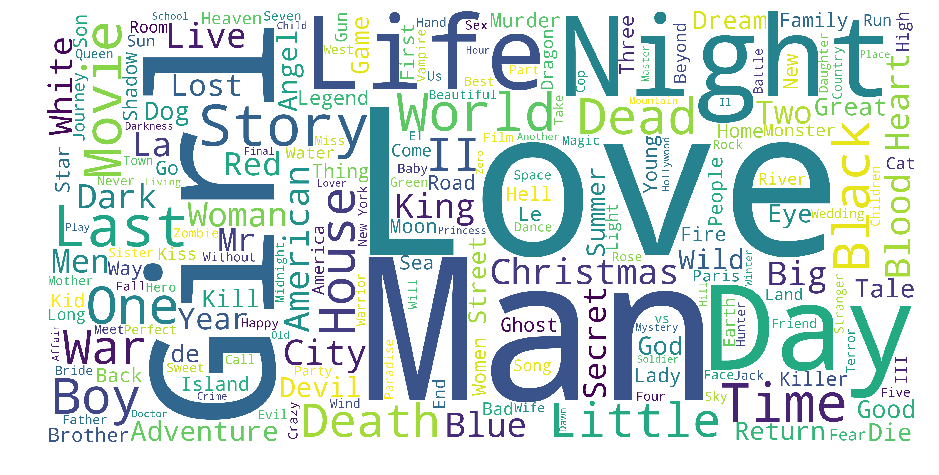

In [14]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

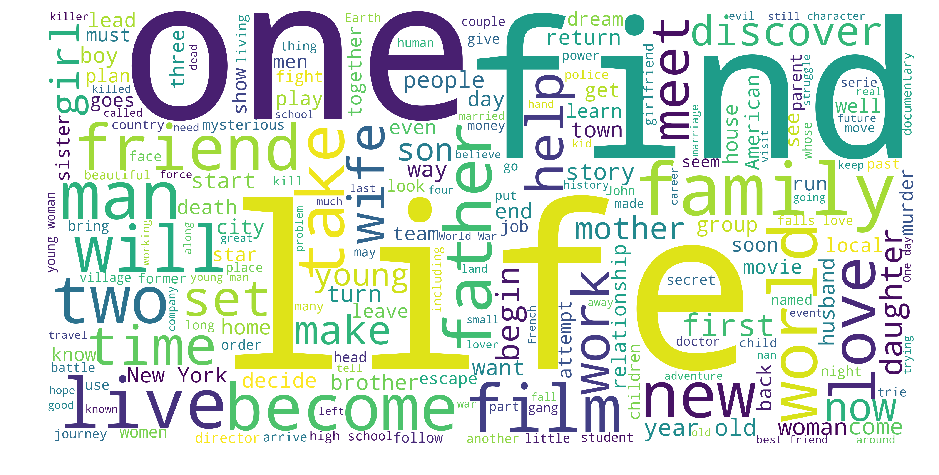

In [15]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

#### Production Countries

In [16]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [17]:
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [18]:
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


#### Franchise Movies

In [19]:
df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

In [20]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

In [21]:
fran_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


In [22]:
fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


In [23]:
fran_pivot.sort_values('count', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
1432,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
977,Police Academy Collection,7,4.352046e+07,3.046432e+08


#### Production Companies

In [24]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [30]:
com_df = df.drop('production_companies', axis=1).join(s)

In [31]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']

In [32]:
com_pivot = pd.concat((com_sum), axis=1)

In [33]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78
Dune Entertainment,1.500379e+10,2.419966e+08,62


#### Original Language

In [34]:
df['original_language'].drop_duplicates().shape[0]

93

In [35]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


#### Popularity, Vote Average and Vote Count

In [36]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [37]:
df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')

In [38]:
df['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

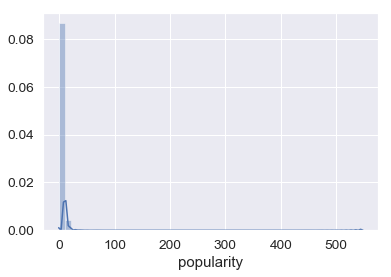

In [39]:
sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.show()

In [ ]:
df['popularity'].plot(logy=True, kind='hist')

In [40]:
df[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


In [42]:
df[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012


In [45]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)
df['vote_average'].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

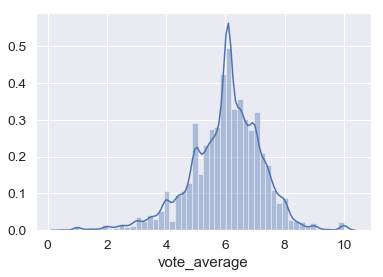

In [46]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

In [47]:
df[df['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
314,The Shawshank Redemption,8.5,8358.0,1994
834,The Godfather,8.5,6024.0,1972
2211,Life Is Beautiful,8.3,3643.0,1997
5481,Spirited Away,8.3,3968.0,2001
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0,1975
1176,Psycho,8.3,2405.0,1960
2843,Fight Club,8.3,9678.0,1999
1178,The Godfather: Part II,8.3,3418.0,1974
12481,The Dark Knight,8.3,12269.0,2008
292,Pulp Fiction,8.3,8670.0,1994


#### Movie Release Dates

In [49]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [50]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [51]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [52]:
df['day'] = df['release_date'].apply(get_day)
df['month'] = df['release_date'].apply(get_month)

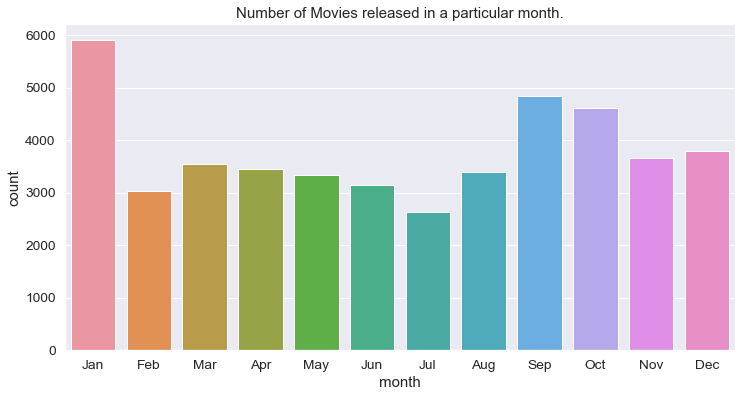

In [53]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=df, order=month_order)

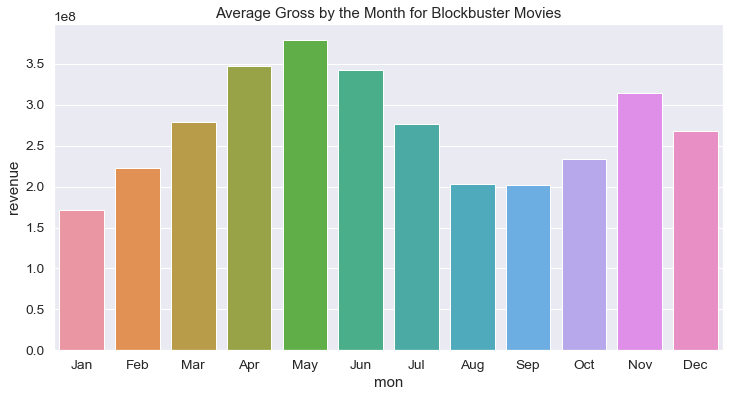

In [54]:
month_mean = pd.DataFrame(df[df['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)

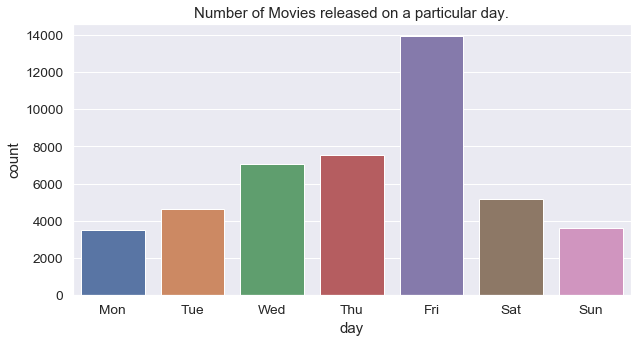

In [55]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=df, order=day_order)

In [57]:
df[df['year'] != 'NaT'][['title', 'year']].sort_values('year').head(10)

,title,year
34940,Passage of Venus,1874
34937,Sallie Gardner at a Gallop,1878
41602,Buffalo Running,1883
34933,Man Walking Around a Corner,1887
34934,Accordion Player,1888
34938,Traffic Crossing Leeds Bridge,1888
34936,"Monkeyshines, No. 2",1890
34939,London's Trafalgar Square,1890
34935,"Monkeyshines, No. 1",1890
41194,Mosquinha,1890


#### Movie Status

In [58]:
df['status'].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

#### Spoken Languages

In [59]:
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: len(x) if isinstance(x, list) else np.nan)

In [60]:
df['spoken_languages'].value_counts()

1     33736
2      5371
0      3835
3      1705
4       550
5       178
6        62
7        14
8         6
9         5
19        1
13        1
12        1
10        1
Name: spoken_languages, dtype: int64

In [61]:
df[df['spoken_languages'] >= 10][['title', 'year', 'spoken_languages']].sort_values('spoken_languages', ascending=False)

,title,year,spoken_languages
22235,Visions of Europe,2004,19
35288,The Testaments,2000,13
14093,To Each His Own Cinema,2007,12
8789,The Adventures of Picasso,1978,10


#### Runtime

In [62]:
df['runtime'].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

In [63]:
df['runtime'] = df['runtime'].astype('float')

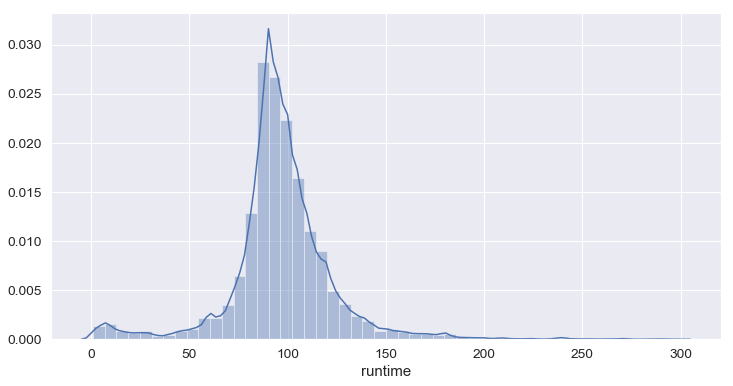

In [64]:
plt.figure(figsize=(12,6))
sns.distplot(df[(df['runtime'] < 300) & (df['runtime'] > 0)]['runtime'])

In [65]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime').head(10)

,runtime,title,year
35146,1.0,La Vague,1891
36577,1.0,Champs de Mars,1900
36576,1.0,Palace of Electricity,1900
44965,1.0,"Luis Martinetti, Contortionist",1894
42357,1.0,A Gathering of Cats,2007
36575,1.0,Eiffel Tower from Trocadero Palace,1900
36574,1.0,Panorama of Eiffel Tower,1900
44714,1.0,The Infernal Caldron,1903
19244,1.0,The Kiss,1896
44646,1.0,The Vanishing Lady,1896


In [66]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime', ascending=False).head(10)

,runtime,title,year
24178,1256.0,Centennial,1978
40938,1140.0,Baseball,1994
19965,1140.0,Jazz,2001
13767,931.0,Berlin Alexanderplatz,1980
13953,925.0,Heimat: A Chronicle of Germany,1984
27855,900.0,The Story of Film: An Odyssey,2011
26682,877.0,Taken,2002
19158,874.0,The War,2007
34667,840.0,The Roosevelts: An Intimate History,2014
34732,840.0,Seventeen Moments in Spring,1973


#### Budget

In [68]:
df[df['budget'].notnull()][['title', 'budget', 'revenue', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2011
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,2007
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
11067,Superman Returns,270000000.0,3.910812e+08,2006
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2017
16130,Tangled,260000000.0,5.917949e+08,2010
18685,John Carter,260000000.0,2.841391e+08,2012
11780,Spider-Man 3,258000000.0,8.908716e+08,2007
21175,The Lone Ranger,255000000.0,8.928991e+07,2013
22059,The Hobbit: The Desolation of Smaug,250000000.0,9.584000e+08,2013


#### Revenue

In [72]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

In [73]:
gross_top = df[['poster_path', 'title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
pd.set_option('display.max_colwidth', 100)
HTML(gross_top.to_html(escape=False))

,poster_path,title,budget,revenue,year
14551,,Avatar,237000000.0,2.787965e+09,2009
26555,,Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015
1639,,Titanic,200000000.0,1.845034e+09,1997
17818,,The Avengers,220000000.0,1.519558e+09,2012
25084,,Jurassic World,150000000.0,1.513529e+09,2015
28830,,Furious 7,190000000.0,1.506249e+09,2015
26558,,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
17437,,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011
22110,,Frozen,150000000.0,1.274219e+09,2013
42222,,Beauty and the Beast,160000000.0,1.262886e+09,2017


#### Genres

In [74]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [75]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [76]:
gen_df = df.drop('genres', axis=1).join(s)

In [77]:
gen_df['genre'].value_counts().shape[0]

32

In [78]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


#### Cast and Crew

In [79]:
credits_df = pd.read_csv('credits.csv')
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender'...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, '...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, '...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'credit_id': '52fe466a9251416c75077a8d', 'gender': 2...","[{'credit_id': '52fe466a9251416c75077a89', 'department': 'Directing', 'gender': 2, 'id': 26502, ...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah' Jackson"", 'credit_id': '52fe44779251416c91011aad...","[{'credit_id': '52fe44779251416c91011acb', 'department': 'Directing', 'gender': 2, 'id': 2178, '...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', 'credit_id': '52fe44959251416c75039eb9', 'gender': ...","[{'credit_id': '52fe44959251416c75039ed7', 'department': 'Sound', 'gender': 2, 'id': 37, 'job': ...",11862


In [80]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [81]:
df['id'] = df['id'].apply(convert_int)

In [82]:
df[df['id'].isnull()]

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,day,month
19730,0.065736,NaN,"[Carousel Productions, Vision View Entertainment, Telescene Film Group Productions]","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_3166_1': 'LU', 'name': 'Luxembourg'}, {'iso_3166_...",NaN,104.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Midnight Man' style='height:100px;'>,[],...,0,NaN,NaN,nan,NaN,NaN,NaN,NaT,NaN,NaN
29503,1.931659,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble Production Committee, Sentai Filmworks]","[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'JP', 'name': 'Japan'}]",NaN,68.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Mardock Scramble: The Third Exhaust' style='height:100p...,[],...,0,NaN,NaN,nan,NaN,NaN,NaN,NaT,NaN,NaN
35587,2.185485,NaN,"[Odyssey Media, Pulser Productions, Rogue State, The Cartel]","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,82.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Avalanche Sharks' style='height:100px;'>,[],...,0,NaN,NaN,nan,NaN,NaN,NaN,NaT,NaN,NaN


In [83]:
df = df.drop([19730, 29503, 35587])

In [84]:
df['id'] = df['id'].astype('int')

In [85]:
df = df.merge(credits_df, on='id')

In [86]:
df['cast'] = df['cast'].apply(ast.literal_eval)
df['crew'] = df['crew'].apply(ast.literal_eval)

In [87]:
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [88]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [89]:
df['director'] = df['crew'].apply(get_director)

In [90]:
s = df.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_df = df.drop('cast', axis=1).join(s)

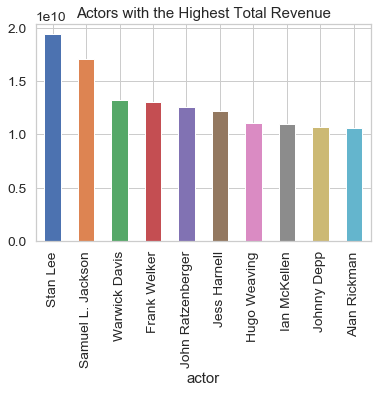

In [91]:
sns.set_style('whitegrid')
plt.title('Actors with the Highest Total Revenue')
cast_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

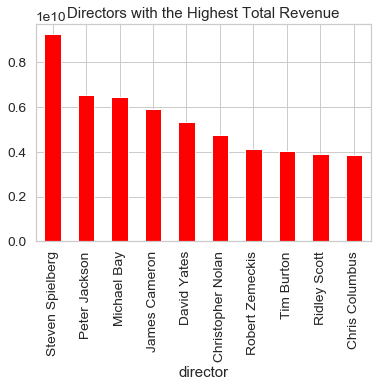

In [92]:
plt.title('Directors with the Highest Total Revenue')
df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn')
plt.show()